##### ARTI 560 - Computer Vision  
## Image Classification using Convolutional Neural Networks (CNNs) - Exercise 

### Objective

In this exercise, you will:

1. **Load the Fashion MNIST dataset** from the [Keras dataset](https://keras.io/api/datasets/) website.
2. **Preprocess the data** for training.
3. **Build your own CNN architecture** and evaluate the model.

In [14]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input
# Load Fashion-MNIST
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

num_classes = len(np.unique(y_train))
print(f"Number of unique classes: {num_classes}")
print("Train:", x_train.shape, y_train.shape)
print("Test: ", x_test.shape, y_test.shape)


Number of unique classes: 10
Train: (60000, 28, 28) (60000,)
Test:  (10000, 28, 28) (10000,)


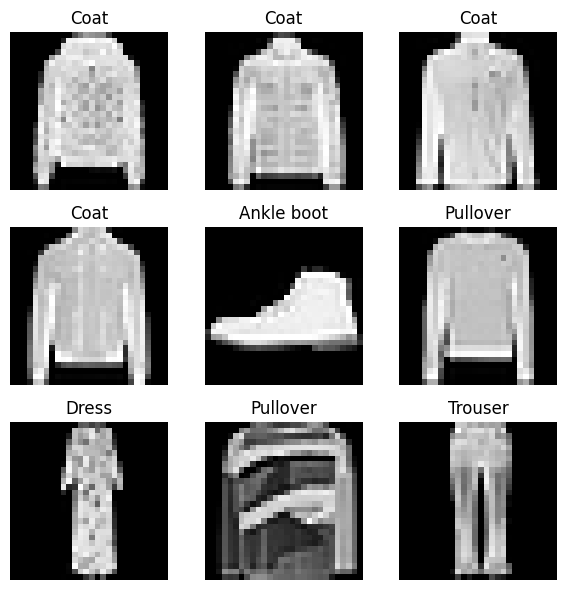

In [15]:
# Plot a 3x3 grid of random images from the dataset with their labels
plt.figure(figsize=(6,6))
idxs = np.random.choice(len(x_train), 9, replace=False)

for i, idx in enumerate(idxs):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_train[idx], cmap="gray")
    plt.title(class_names[y_train[idx]])
    plt.axis("off")

plt.tight_layout()
plt.show()


0 (T-shirt/top): 6000
1 (Trouser): 6000
2 (Pullover): 6000
3 (Dress): 6000
4 (Coat): 6000
5 (Sandal): 6000
6 (Shirt): 6000
7 (Sneaker): 6000
8 (Bag): 6000
9 (Ankle boot): 6000


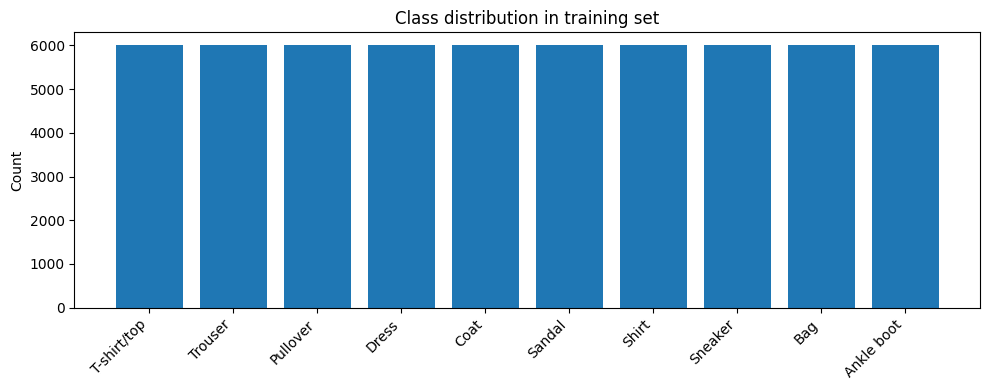

In [7]:
# Count occurrences of each class in the training set + plot the class distribution
counts = np.bincount(y_train, minlength=len(class_names))

for i, c in enumerate(counts):
    print(f"{i} ({class_names[i]}): {c}")

plt.figure(figsize=(10,4))
plt.bar(class_names, counts)
plt.xticks(rotation=45, ha="right")
plt.title("Class distribution in training set")
plt.ylabel("Count")
plt.tight_layout()
plt.show()




### Build your Image Classification Model
Note: Don't use one hot encoding and use sparse_categorical_crossentropy for loss

In [16]:
# Import libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input

# Normalize pixel values for x_train and x_test (scaling them between 0 and 1)
x_train_norm = x_train.astype('float32') / 255.0
x_test_norm = x_test.astype('float32') / 255.0

x_train_norm = np.expand_dims(x_train_norm, axis=-1)
x_test_norm = np.expand_dims(x_test_norm, axis=-1)

# One-hot encode the labels 

# Build a CNN model
model = Sequential([
    Input(shape=(28, 28, 1)),
    Conv2D(32, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax') # 10 output classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
print("Training the model...")
history = model.fit(x_train_norm, y_train, epochs=5, batch_size=64, validation_split=0.2)

# Evaluate the model
print("\nEvaluating the model on test data...")
test_loss, test_acc = model.evaluate(x_test_norm, y_test)
print(f"\nFinal Test Accuracy: {test_acc:.4f}")


Training the model...
Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.8134 - loss: 0.5142 - val_accuracy: 0.8674 - val_loss: 0.3752
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8796 - loss: 0.3333 - val_accuracy: 0.8804 - val_loss: 0.3241
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8942 - loss: 0.2882 - val_accuracy: 0.8936 - val_loss: 0.2915
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9073 - loss: 0.2558 - val_accuracy: 0.8905 - val_loss: 0.2982
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9151 - loss: 0.2318 - val_accuracy: 0.9099 - val_loss: 0.2547

Evaluating the model on test data...
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9029 - loss: 0.2661

Final Test Accuracy: 0.9029
